Calculate the Bayes Factor for $g-r$ to determine whether the void and wall samples are drawn from the same or different parent distributions.

In [1]:
from astropy.table import Table
from astropy.io import fits

import numpy as np

import sys

import pickle

import dynesty
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc

import matplotlib
import matplotlib.pyplot as plt

from functions import Model_1_plot, Model_2_plot, uniform, jeffreys, Model_1_fit, Model_2_fit, Model_1_sampler, Model_2_sampler
#from functions_gauss import Model_1_fit, Model_2_fit, Model_1_sampler, Model_2_sampler

np.set_printoptions(threshold=sys.maxsize)

In [2]:
matplotlib.rc('font', size=14)
matplotlib.rc('font', family='DejaVu Sans')

# Data

In [3]:
data_filename = '../../../../data/NSA_v1_0_1_VAGC_vflag-V2-VF.fits'

hdu = fits.open(data_filename)
data = Table(hdu[1].data)
hdu.close()

## Just keep the main SDSS DR7 footprint

In [4]:
# When the catalog is the NSA, only keep those objects which were originally in the DR7 LSS
catalog_SDSS = data[data['IN_DR7_LSS'] == 1]

ra_boolean = np.logical_and(catalog_SDSS['RA'] > 110, catalog_SDSS['RA'] < 270)
catalog_north = catalog_SDSS[ra_boolean]

strip_boolean = np.logical_and.reduce([catalog_north['RA'] > 250, 
                                       catalog_north['RA'] < 269, 
                                       catalog_north['DEC'] > 51, 
                                       catalog_north['DEC'] < 67])
catalog_main = catalog_north[~strip_boolean]

In [5]:
gr_NSA = np.array(catalog_main['g_r'])

## Separate galaxies by their LSS classifications

### $V^2$

In [6]:
wall_v2 = catalog_main['vflag_V2'] == 0
void_v2 = catalog_main['vflag_V2'] == 1
edge_v2 = catalog_main['vflag_V2'] == 2
out_v2 = catalog_main['vflag_V2'] == 9

### VoidFinder

In [7]:
wall_vf = catalog_main['vflag_VF'] == 0
void_vf = catalog_main['vflag_VF'] == 1
edge_vf = catalog_main['vflag_VF'] == 2
out_vf = catalog_main['vflag_VF'] == 9

In [8]:
del catalog_main, catalog_north, data

# Fit the color distributions with skewnormal distributions

Both one- and two-parent models

This is a bimodal distribution

In [9]:
gr_bins = np.arange(0, 1.25, 0.02)

### 1-parent model

In [10]:
gr_fit_bounds1 = [[0.1, 10],    # s ........ Gaussian 1 to 2 scale factor
                  [100, 10000], # a ........ Gaussian a amplitude
                  [0, 0.75],    # mu_a ..... Gaussian a location
                  [1e-5, 2],    # sigma_a .. Gaussian a scale
                  [-10, 10],    # skew_a ... Gaussian a skew
                  [100, 10000], # b ........ Gaussian b amplitude
                  [0.75, 1.25], # mu_b ..... Gaussian b location
                  [1e-5, 1],    # sigma_b .. Gaussian b scale
                  [-10, 10]]    # skew_b ... Gaussian b skew

V2_gr_bestfit1 = Model_1_fit(gr_fit_bounds1, 
                             gr_NSA[wall_v2], 
                             gr_NSA[void_v2], 
                             gr_bins, 
                             2)

V2_gr_bestfit1

running minimizer...this might take a few minutes...


      fun: 1075.382051575673
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 5.39284887e-01, -1.84174625e-03,  1.89395451e+00, -9.30185707e-02,
        2.16959962e-01, -6.41193256e-03, -1.75652985e+00,  4.81531970e-01,
       -4.51109375e-02])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 3110
      nit: 236
     njev: 311
   status: 0
  success: True
        x: array([ 2.40755603e+00,  1.15592141e+03,  4.18436466e-01,  2.32891007e-01,
        1.20017693e+00,  8.83919721e+02,  9.61960886e-01,  1.36418686e-01,
       -2.24278214e+00])

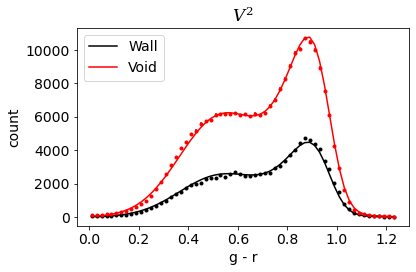

In [11]:
Model_1_plot(V2_gr_bestfit1.x, 
             gr_NSA[wall_v2], 
             gr_NSA[void_v2], 
             gr_bins, 
             2, 
             xlabel_text='g - r', 
             title_text='$V^2$')

In [13]:
gr_fit_bounds1 = [[0.1, 10],    # s ........ Gaussian 1 to 2 scale factor
                  [100, 10000], # a ........ Gaussian a amplitude
                  [0, 0.75],    # mu_a ..... Gaussian a location
                  [1e-5, 2],    # sigma_a .. Gaussian a scale
                  [-10, 10],    # skew_a ... Gaussian a skew
                  [100, 10000], # b ........ Gaussian b amplitude
                  [0.75, 1.25], # mu_b ..... Gaussian b location
                  [1e-5, 1],    # sigma_b .. Gaussian b scale
                  [-10, 10]]    # skew_b ... Gaussian b skew

VF_gr_bestfit1 = Model_1_fit(gr_fit_bounds1, 
                             gr_NSA[wall_vf], 
                             gr_NSA[void_vf], 
                             gr_bins, 
                             2)

VF_gr_bestfit1

running minimizer...this might take a few minutes...


      fun: 4698.212852052053
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.39451765e+00, -2.09185994e-03,  7.03948900e-02, -4.65597623e+00,
        3.80168788e-01, -1.27330605e-03,  5.66633386e+00,  1.74246452e+01,
        3.15230866e-01])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 2780
      nit: 221
     njev: 278
   status: 0
  success: True
        x: array([ 3.54402608e-01,  2.74524245e+03,  4.19710898e-01,  2.28478194e-01,
        1.16343625e+00,  2.10350378e+03,  9.60399785e-01,  1.36282068e-01,
       -2.31348569e+00])

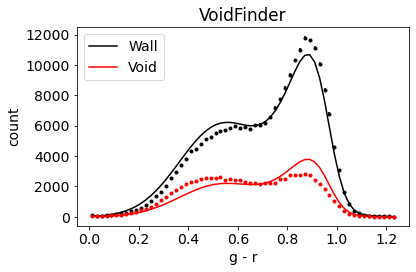

In [14]:
Model_1_plot(VF_gr_bestfit1.x, 
             gr_NSA[wall_vf], 
             gr_NSA[void_vf], 
             gr_bins, 
             2, 
             xlabel_text='g - r', 
             title_text='VoidFinder')

### Nested sampling of Likelihood and Priors

#### V$^2$

In [22]:
def prior_xform1_bi_V2(u):
    '''
    Priors for the 9 parameters of bimodel M1.  Required by the dynesty 
    sampler.


    PARAMETERS
    ==========

    u : ndarray
        Array of uniform random numbers between 0 and 1.


    RETURNS
    =======
    
    priors : ndarray
        Transformed random numbers giving prior ranges on model parameters.
    '''

    s = uniform(0.1, 10, u[0])
    
    a = jeffreys(500, 5000, u[1])
    mu_a = uniform(0, 0.75, u[2])
    sigma_a = uniform(0.01, 3, u[3])
    skew_a = uniform(-5, 5, u[4])
    
    b = jeffreys(100, 5000, u[5])
    mu_b = uniform(0.75, 1.25, u[6])
    sigma_b = uniform(0.01, 3, u[7])
    skew_b = uniform(-5, 0, u[8])

    return s, a, mu_a, sigma_a, skew_a, b, mu_b, sigma_b, skew_b

In [23]:
Model_1_sampler(prior_xform1_bi_V2, 
                gr_NSA[wall_v2], 
                gr_NSA[void_v2], 
                gr_bins, 
                2, 
                '_gr_V2')

running the nested sampler... this might take from minutes to hours...


45658it [22:10, 34.32it/s, batch: 8 | bound: 1219 | nc: 13 | ncall: 1070398 | eff(%):  4.266 | loglstar: -1085.314 < -1075.864 < -1077.236 | logz: -1128.014 +/-  0.431 | stop:  0.966]         


sampler output saved as pickle file 'dynesty_output/sampler_results_model1_gr_V2'


In [10]:
temp_infile = open('dynesty_output/sampler_results_model1_gr_V2.pickle', 'rb')
dres1_V2_gr = pickle.load(temp_infile)
temp_infile.close()

In [11]:
labels1_bi = ['s', 'a', r'$\mu_a$', r'$\sigma_a$', 'skew$_a$', 
                   'b', r'$\mu_b$', r'$\sigma_b$', 'skew$_b$']
labels2_bi = ['$a_1$', r'$\mu_{1a}$', r'$\sigma_{1a}$', 'skew$_{1a}$', 
              '$b_1$', r'$\mu_{1b}$', r'$\sigma_{1b}$', 'skew$_{1b}$', 
              '$a_2$', r'$\mu_{2a}$', r'$\sigma_{2a}$', 'skew$_{2a}$', 
              '$b_2$', r'$\mu_{2b}$', r'$\sigma_{2b}$', 'skew$_{2b}$']

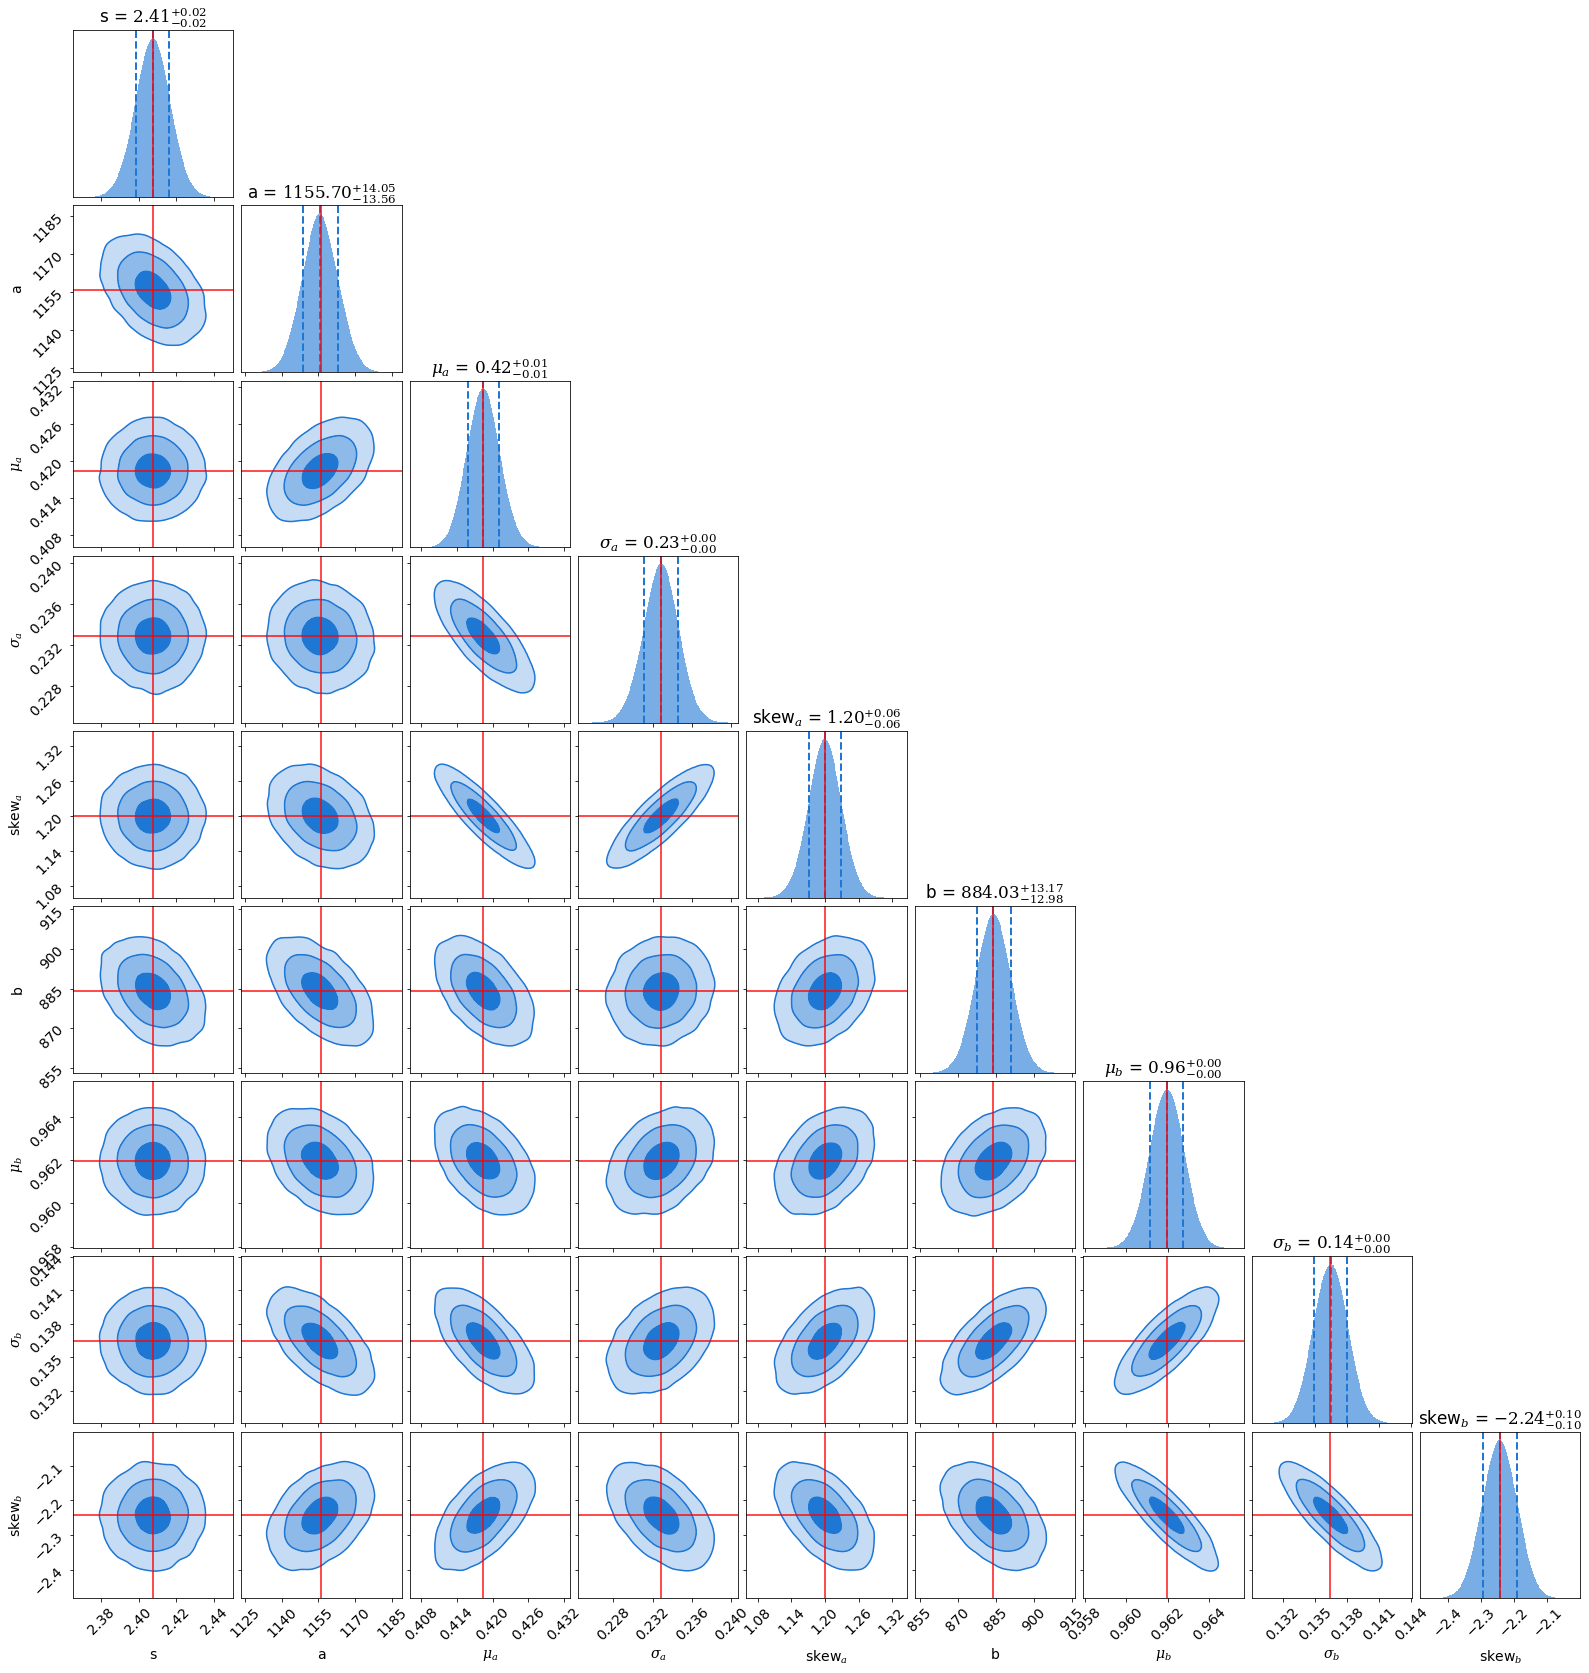

In [17]:
n_params = len(labels1_bi)

fig, axes = dyplot.cornerplot(dres1_V2_gr, smooth=0.03, 
                              labels=labels1_bi, 
                              truths=V2_gr_bestfit1.x,
                              show_titles=True, 
                              quantiles_2d=[1-np.exp(-0.5*r**2) for r in [1, 2, 3]], 
                              quantiles=[0.16, 0.5, 0.84], 
                              fig=plt.subplots(n_params, n_params, figsize=(2.5*n_params, 2.6*n_params)), 
                              color='#1f77d4')

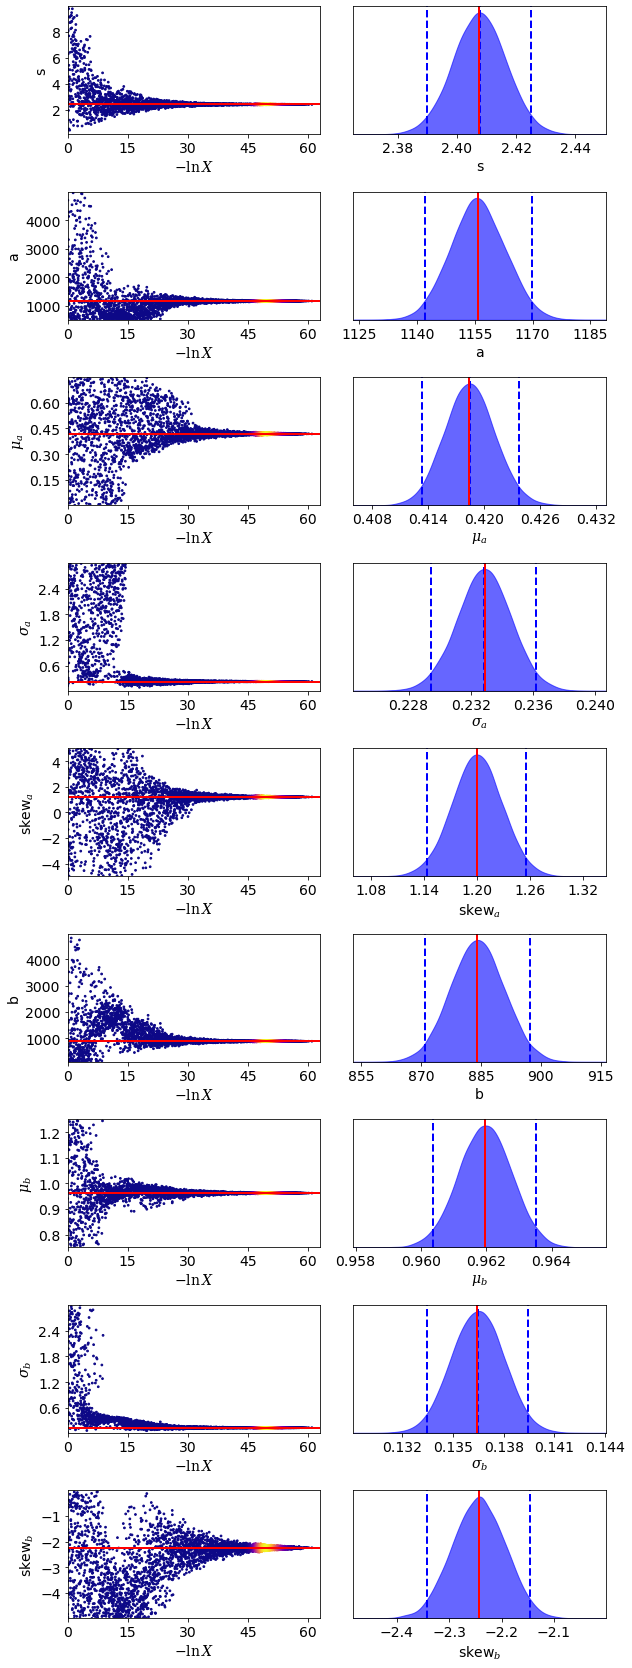

In [18]:
n_params = len(labels1_bi)

fig, axes = dyplot.traceplot(dres1_V2_gr, 
                             labels=labels1_bi, 
                             truths=V2_gr_bestfit1.x,
                             fig=plt.subplots(n_params, 2, figsize=(n_params, 2.6*n_params)), 
                             thin=10)

fig.tight_layout();

In [12]:
lnzM1_V2_gr = dres1_V2_gr.logz[-1]
lnzM1_V2_gr

-1128.0280919113243

In [13]:
V2_gr_bestfit1_dynesty,_ = dyfunc.mean_and_cov(dres1_V2_gr.samples, 
                                               np.exp(dres1_V2_gr.logwt - lnzM1_V2_gr))

V2_gr_bestfit1_dynesty

array([ 2.40761248e+00,  1.15578074e+03,  4.18473672e-01,  2.32861170e-01,
        1.19987118e+00,  8.84042839e+02,  9.61961638e-01,  1.36455184e-01,
       -2.24365344e+00])

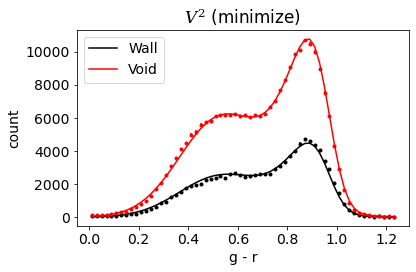

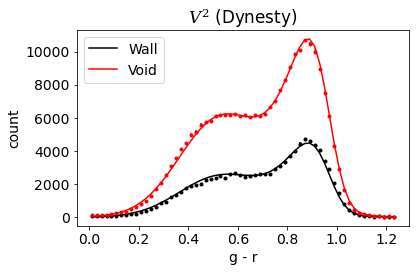

In [21]:
Model_1_plot(V2_gr_bestfit1.x, 
             gr_NSA[wall_v2], 
             gr_NSA[void_v2], 
             gr_bins, 
             2, 
             xlabel_text='g - r', 
             title_text='$V^2$ (minimize)')

Model_1_plot(V2_gr_bestfit1_dynesty, 
             gr_NSA[wall_v2], 
             gr_NSA[void_v2], 
             gr_bins, 
             2, 
             xlabel_text='g - r', 
             title_text='$V^2$ (Dynesty)')

#### VoidFinder

In [31]:
def prior_xform1_bi_VF(u):
    '''
    Priors for the 9 parameters of bimodel M1.  Required by the dynesty 
    sampler.


    PARAMETERS
    ==========

    u : ndarray
        Array of uniform random numbers between 0 and 1.


    RETURNS
    =======
    
    priors : ndarray
        Transformed random numbers giving prior ranges on model parameters.
    '''

    s = uniform(0.1, 5, u[0])
    
    a = jeffreys(500, 10000, u[1])
    mu_a = uniform(0, 0.75, u[2])
    sigma_a = uniform(0.01, 3, u[3])
    skew_a = uniform(0, 5, u[4])
    
    b = jeffreys(500, 10000, u[5])
    mu_b = uniform(0.75, 1.25, u[6])
    sigma_b = uniform(0.01, 2, u[7])
    skew_b = uniform(-5, 0, u[8])

    return s, a, mu_a, sigma_a, skew_a, b, mu_b, sigma_b, skew_b

In [32]:
Model_1_sampler(prior_xform1_bi_VF, 
                gr_NSA[wall_vf], 
                gr_NSA[void_vf], 
                gr_bins, 
                2, 
                '_gr_VoidFinder')

running the nested sampler... this might take from minutes to hours...


46685it [09:49, 79.22it/s, batch: 8 | bound: 531 | nc: 1 | ncall: 452093 | eff(%): 10.326 | loglstar: -4708.502 < -4698.573 < -4700.690 | logz: -4751.053 +/-  0.430 | stop:  0.837]          


sampler output saved as pickle file 'dynesty_output/sampler_results_model1_gr_VoidFinder'


In [14]:
temp_infile = open('dynesty_output/sampler_results_model1_gr_VoidFinder.pickle', 'rb')
dres1_VF_gr = pickle.load(temp_infile)
temp_infile.close()

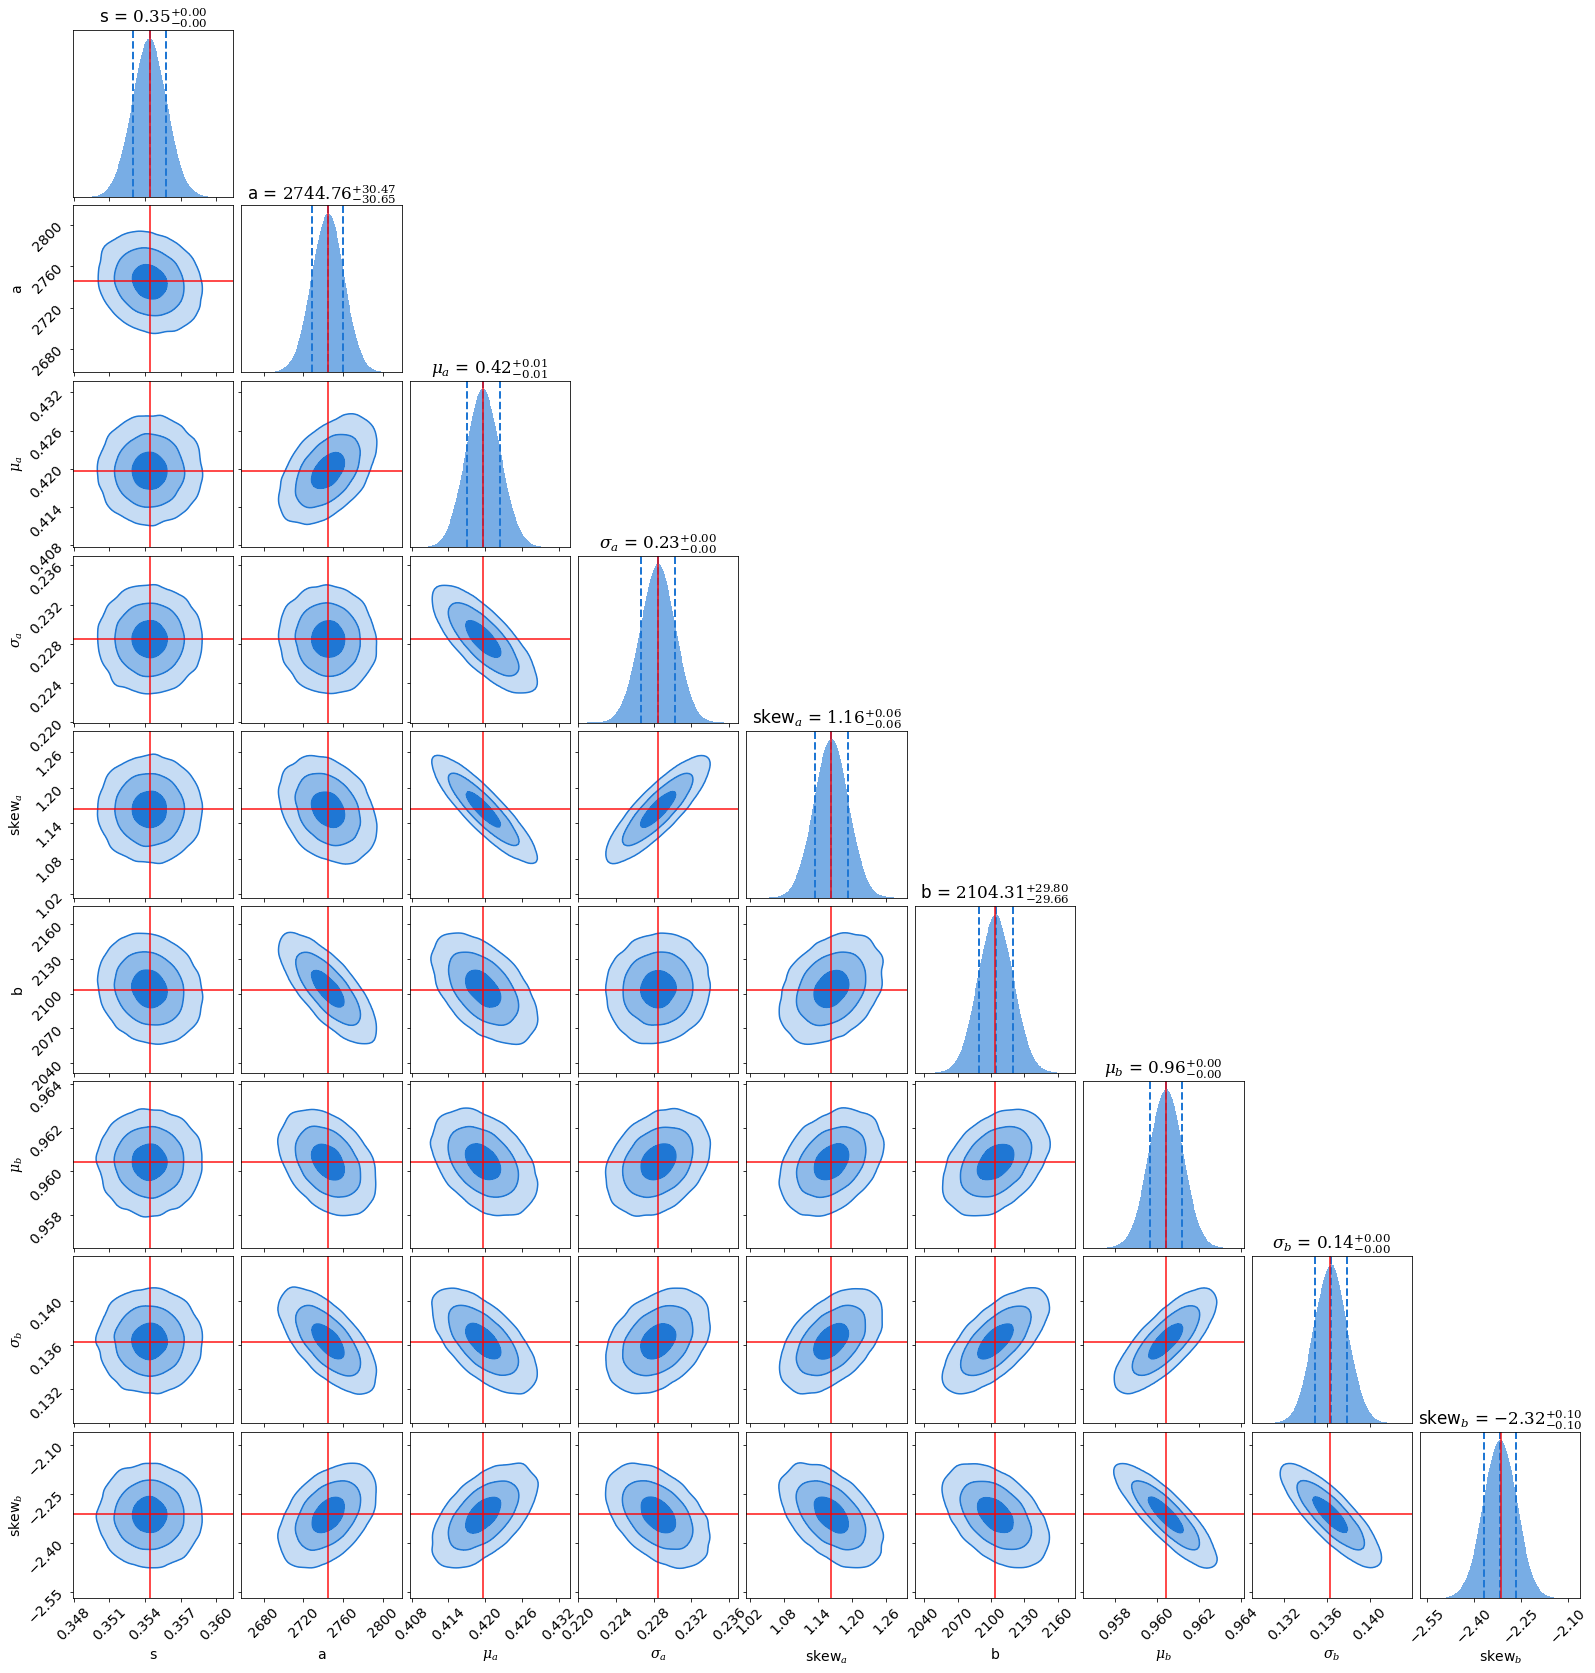

In [23]:
n_params = len(labels1_bi)

fig, axes = dyplot.cornerplot(dres1_VF_gr, smooth=0.03, 
                              labels=labels1_bi, 
                              truths=VF_gr_bestfit1.x,
                              show_titles=True, 
                              quantiles_2d=[1-np.exp(-0.5*r**2) for r in [1, 2, 3]], 
                              quantiles=[0.16, 0.5, 0.84], 
                              fig=plt.subplots(n_params, n_params, figsize=(2.5*n_params, 2.6*n_params)), 
                              color='#1f77d4')

In [15]:
lnzM1_VF_gr = dres1_VF_gr.logz[-1]
lnzM1_VF_gr

-4751.012223093637

In [16]:
VF_gr_bestfit1_dynesty,_ = dyfunc.mean_and_cov(dres1_VF_gr.samples, 
                                               np.exp(dres1_VF_gr.logwt - lnzM1_VF_gr))

VF_gr_bestfit1_dynesty

array([ 3.54384107e-01,  2.74472174e+03,  4.19712520e-01,  2.28450762e-01,
        1.16331060e+00,  2.10430682e+03,  9.60420825e-01,  1.36356744e-01,
       -2.31575519e+00])

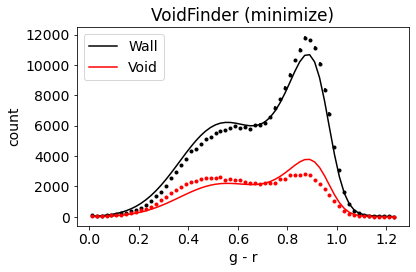

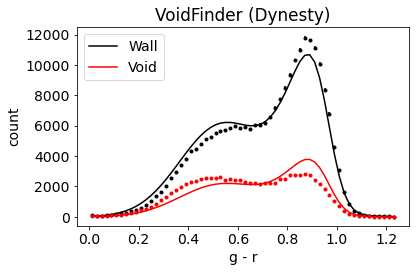

In [26]:
Model_1_plot(VF_gr_bestfit1.x, 
             gr_NSA[wall_vf], 
             gr_NSA[void_vf], 
             gr_bins, 
             2, 
             xlabel_text='g - r', 
             title_text='VoidFinder (minimize)')

Model_1_plot(VF_gr_bestfit1_dynesty, 
             gr_NSA[wall_vf], 
             gr_NSA[void_vf], 
             gr_bins, 
             2, 
             xlabel_text='g - r', 
             title_text='VoidFinder (Dynesty)')

## 2-parent model

In [27]:
# 1 = wall, 2 = void

gr_fit_bounds2 = [[100, 5000],  # a1 ........ Gaussian A1 amplitude
                  [0, 0.7],     # mu_a1 ..... Gaussian A1 location
                  [0.01, 10],   # sigma_a1 .. Gaussian A1 scale
                  [-10, 10],     # skew_a1 ... Gaussian A1 skew
                  [500, 10000], # b1 ........ Gaussian B1 amplitude
                  [0.7, 1.25],  # mu_b1 ..... Gaussian B1 location
                  [0.001, 3],   # sigma_b1 .. Gaussian B1 scale
                  [-5, 5],      # skew_b1 ... Gaussian B1 skew
                  [2400, 2800], #[100, 8000], # a2 ........ Gaussian A2 amplitude (2600)
                  [0.35, 0.45], #[0.2, 0.7],    # mu_a2 ..... Gaussian A2 location (0.40)
                  [0.18, 0.28], #[0.01, 10],    # sigma_a2 .. Gaussian A2 scale (0.23)
                  [1, 2], #[-5, 10],      # skew_a2 ... Gaussian A2 skew (1.29)
                  [2000, 2400], #[500, 10000],  # b2 ........ Gaussian B2 amplitude (2200)
                  [0.9, 1.1], #[0.7, 1.25], # mu_b2 ..... Gaussian B2 location (0.96)
                  [0.1, 0.2], #[0.01, 3],    # sigma_b2 .. Gaussian B2 scale (0.15)
                  [-3.5, -1.5]] #[-10, 5]]     # skew_b2 ... Gaussian B2 skew (-2.5)

V2_gr_bestfit2 = Model_2_fit(gr_fit_bounds2, 
                             gr_NSA[wall_v2], 
                             gr_NSA[void_v2], 
                             gr_bins, 
                             2)

V2_gr_bestfit2

running minimizer...this might take a few minutes...


      fun: 1090.8595472103245
 hess_inv: <16x16 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.70709746e-01, -6.24768291e+00, -9.71886039e-01, -1.78788470e+00,
        7.74920418e-01,  9.65276281e+00, -3.71169335e+00,  1.29830369e-02,
        1.26625739e-01, -2.68867098e+00, -2.18178684e+00, -2.15168258e+00,
        4.96498408e-01, -1.68946143e+01, -4.75324669e+00, -7.00833884e-01])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 9027
      nit: 462
     njev: 531
   status: 0
  success: True
        x: array([ 9.47076245e+02,  3.80170638e-01,  2.41039989e-01,  1.50145707e+00,
        1.10248255e+03,  9.77004995e-01,  1.77475214e-01, -3.25198884e+00,
        2.67505461e+03,  4.02258856e-01,  2.32325711e-01,  1.29334434e+00,
        2.26432538e+03,  9.63225509e-01,  1.48011677e-01, -2.48116165e+00])

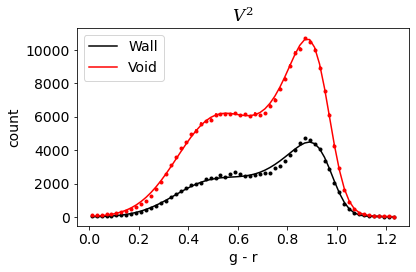

In [28]:
Model_2_plot(V2_gr_bestfit2.x, 
             gr_NSA[wall_v2], 
             gr_NSA[void_v2], 
             gr_bins, 
             2, 
             xlabel_text='g - r', 
             title_text='$V^2$')

In [43]:
# 1 = wall, 2 = void

gr_fit_bounds2 = [[1000, 5000],  # a1 ........ Gaussian A1 amplitude
                  [0.2, 0.7],    # mu_a1 ..... Gaussian A1 location
                  [0.01, 1],    # sigma_a1 .. Gaussian A1 scale
                  [0, 5],      # skew_a1 ... Gaussian A1 skew
                  [1000, 5000],  # b1 ........ Gaussian B1 amplitude
                  [0.7, 1.25], # mu_b1 ..... Gaussian B1 location
                  [0.01, 0.2],    # sigma_b1 .. Gaussian B1 scale
                  [-5, 0],      # skew_b1 ... Gaussian B1 skew
                  [1000, 1200], #[500, 5000],  # a2 ........ Gaussian A2 amplitude (1100)
                  [0.25, 0.45], #[0, 0.7],    # mu_a2 ..... Gaussian A2 location (0.37)
                  [0.1, 0.3], #[0.1, 5],    # sigma_a2 .. Gaussian A2 scale (0.23)
                  [0, 2], #[0, 10],      # skew_a2 ... Gaussian A2 skew (1.4)
                  [500, 700], #[100, 5000],  # b2 ........ Gaussian B2 amplitude (630)
                  [0.85, 1.05], #[0.7, 1.25], # mu_b2 ..... Gaussian B2 location (0.96)
                  [0.1, 0.2], #[0.01, 5],    # sigma_b2 .. Gaussian B2 scale (0.16)
                  [-5, 0]] #[-10, 0]]    # skew_b2 ... Gaussian B2 skew (-2.6)

VF_gr_bestfit2 = Model_2_fit(gr_fit_bounds2, 
                             gr_NSA[wall_vf], 
                             gr_NSA[void_vf], 
                             gr_bins, 
                             2)

VF_gr_bestfit2

running minimizer...this might take a few minutes...


      fun: 891.281753038825
 hess_inv: <16x16 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.76762165e-01, -1.36136350e+01, -4.35205493e+01, -1.65141501e+00,
        9.26557526e-03, -8.17287851e+00,  8.28527505e+01, -3.47461084e-01,
       -6.30161437e-01,  1.19669949e+01,  2.71893669e+01, -1.09660505e+01,
       -3.30510112e-01, -1.43321358e+01, -3.17407398e+01,  1.95697681e+01])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 7565
      nit: 359
     njev: 445
   status: 0
  success: True
        x: array([ 2.63214412e+03,  4.48082924e-01,  2.21211563e-01,  1.01918283e+00,
        2.22625407e+03,  9.60513876e-01,  1.29306080e-01, -2.21186132e+00,
        1.12827998e+03,  3.84899591e-01,  2.28938779e-01,  1.26256530e+00,
        5.72222515e+02,  9.47088204e-01,  1.39487933e-01, -1.93256147e+00])

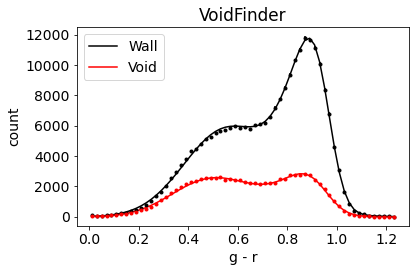

In [44]:
Model_2_plot(VF_gr_bestfit2.x, 
             gr_NSA[wall_vf], 
             gr_NSA[void_vf], 
             gr_bins, 
             2, 
             xlabel_text='g - r', 
             title_text='VoidFinder')

### Nested sampling of Likelihood and Priors

#### V$^2$

In [47]:
def prior_xform2_bi_V2(u):
    '''
    Priors for the 16 parameters of bimodal M2.  Required by the dynesty 
    sampler.


    PARAMETERS
    ==========

    u : ndarray
        Array of uniform random numbers between 0 and 1.


    RETURNS
    =======
    
    priors : ndarray
        Transformed random numbers giving prior ranges on model parameters.
    '''

    a1 = jeffreys(100, 2500, u[0])
    mu_a1 = uniform(0.2, 0.7, u[1])
    sigma_a1 = uniform(0.01, 1, u[2])
    skew_a1 = uniform(0, 5, u[3])

    b1 = jeffreys(500, 5000, u[4])
    mu_b1 = uniform(0.7, 1.2, u[5])
    sigma_b1 = uniform(0.01, 1, u[6])
    skew_b1 = uniform(-5, 0, u[7])
    
    a2 = jeffreys(1000, 5000, u[8])
    mu_a2 = uniform(0.2, 0.7, u[9])
    sigma_a2 = uniform(0.01, 1, u[10])
    skew_a2 = uniform(0, 5, u[11])

    b2 = jeffreys(1000, 5000, u[12])
    mu_b2 = uniform(0.7, 1.2, u[13])
    sigma_b2 = uniform(0.01, 1, u[14])
    skew_b2 = uniform(-5, 0, u[15])

    return a1, mu_a1, sigma_a1, skew_a1, b1, mu_b1, sigma_b1, skew_b1, \
           a2, mu_a2, sigma_a2, skew_a2, b2, mu_b2, sigma_b2, skew_b2

In [48]:
Model_2_sampler(prior_xform2_bi_V2, 
                gr_NSA[wall_v2], 
                gr_NSA[void_v2], 
                gr_bins, 
                2, 
                '_gr_V2')

running the nested sampler... this might take from minutes to hours...


11684it [03:11, 48.49it/s, batch: 0 | bound: 150 | nc: 25 | ncall: 267677 | eff(%):  4.357 | loglstar:   -inf < -5476.956 <    inf | logz: -5505.752 +/-  0.337 | dlogz: 2751.199 >  0.010] /Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
12347it [03:24, 56.58it/s, batch: 0 | bound: 160 | nc: 25 | ncall: 285584 | eff(%):  4.316 | loglstar:   -inf < -4797.818 <    inf | logz: -4828.673 +/-  0.346 | dlogz: 2073.172 >  0.010] /Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/dynesty/sampling.py:243: UserWarning: R

sampler output saved as pickle file 'dynesty_output/sampler_results_model2_gr_V2'


In [49]:
temp_infile = open('dynesty_output/sampler_results_model2_gr_V2.pickle', 'rb')
dres2_V2_gr = pickle.load(temp_infile)
temp_infile.close()

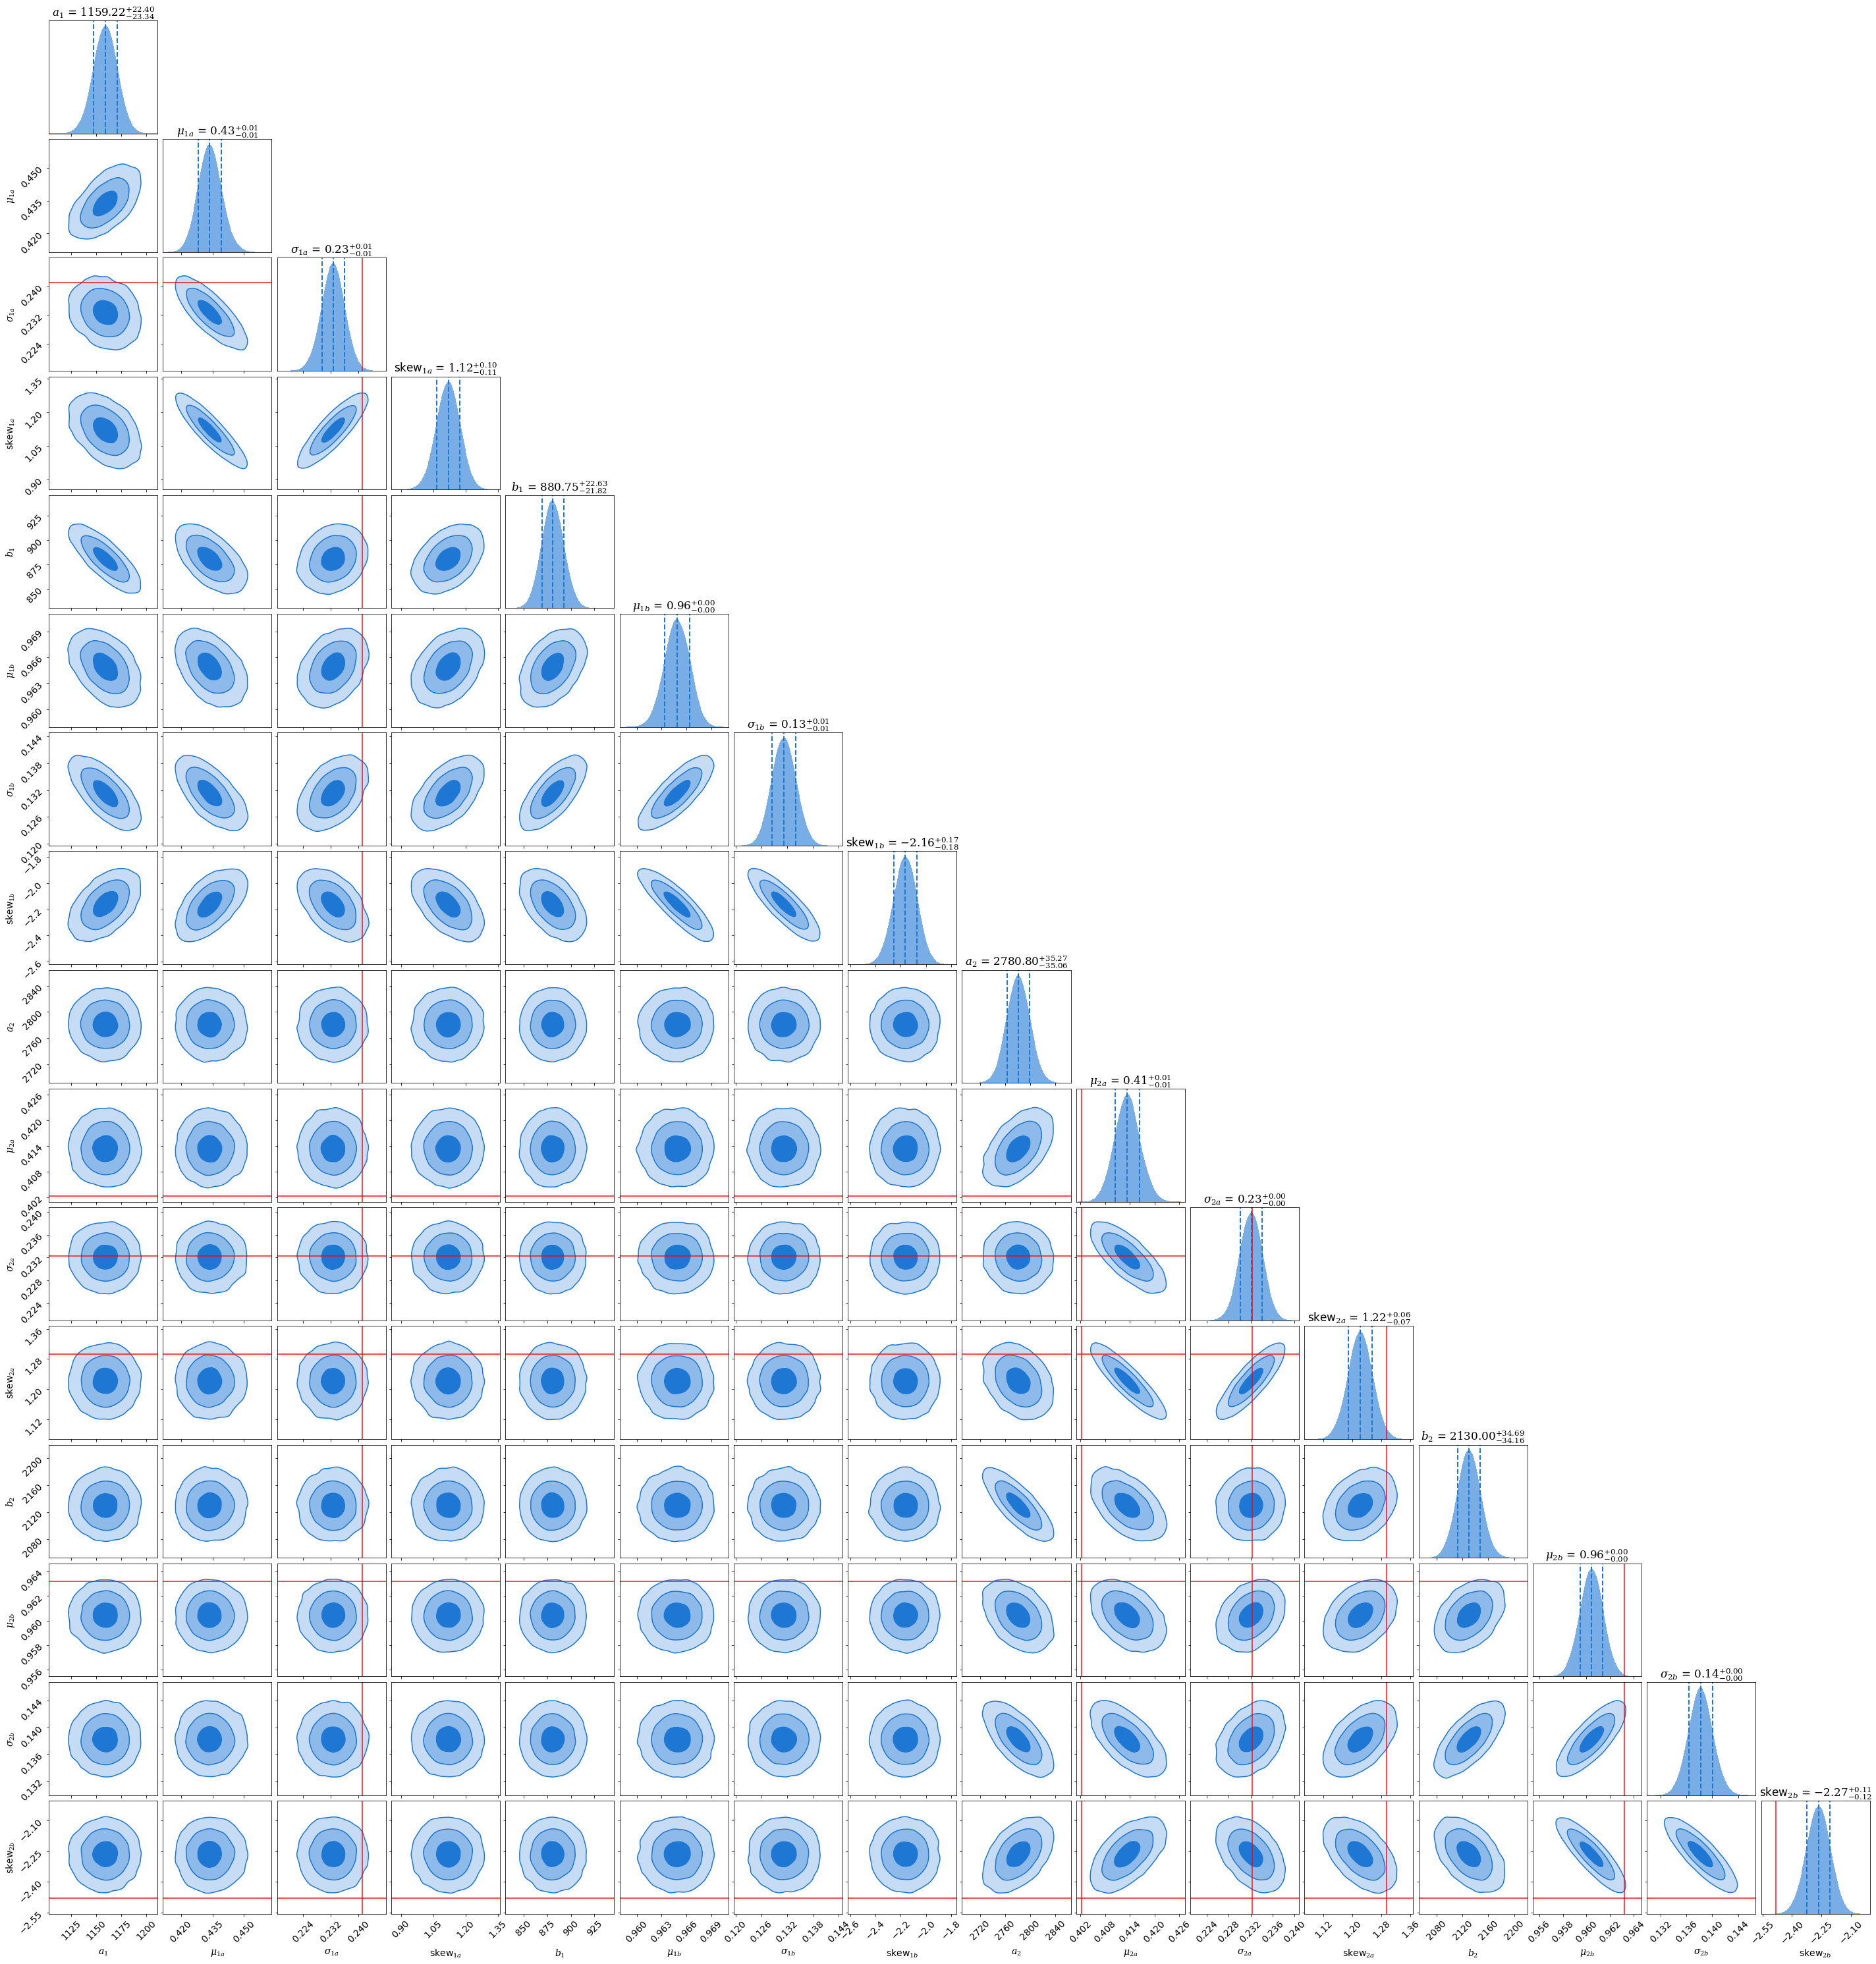

In [50]:
n_params = len(labels2_bi)

fig, axes = dyplot.cornerplot(dres2_V2_gr, smooth=0.03, 
                              labels=labels2_bi, 
                              truths=V2_gr_bestfit2.x,
                              show_titles=True, 
                              quantiles_2d=[1-np.exp(-0.5*r**2) for r in [1, 2, 3]], 
                              quantiles=[0.16, 0.5, 0.84], 
                              fig=plt.subplots(n_params, n_params, figsize=(2.5*n_params, 2.6*n_params)), 
                              color='#1f77d4')

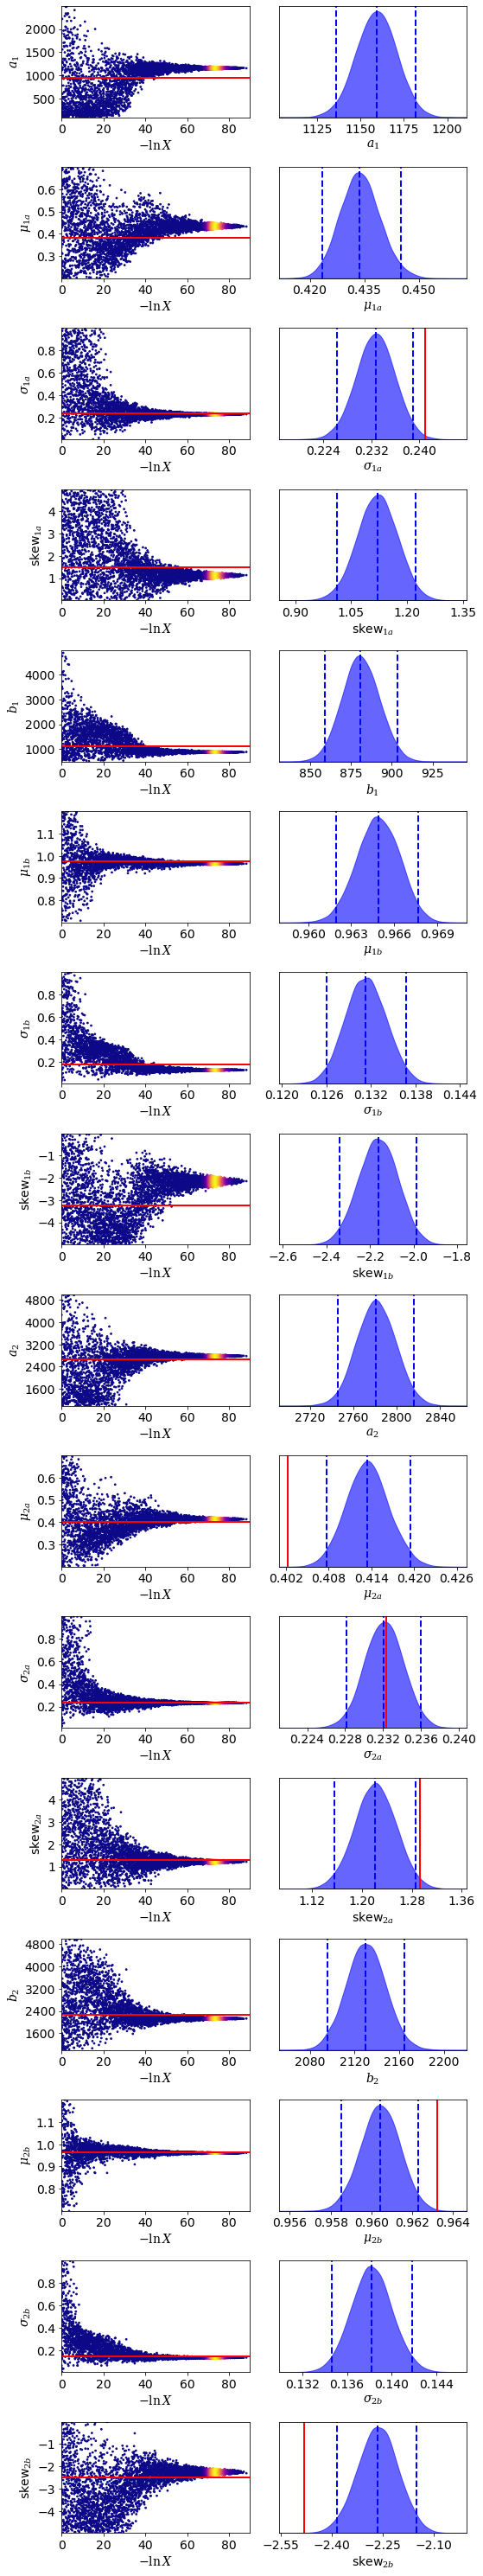

In [52]:
n_params = len(labels2_bi)

fig, axes = dyplot.traceplot(dres2_V2_gr, 
                             labels=labels2_bi, 
                             truths=V2_gr_bestfit2.x,
                             fig=plt.subplots(n_params, 2, figsize=(0.5*n_params, 2.6*n_params)), 
                             thin=10)

fig.tight_layout();

In [53]:
lnzM2_V2_gr = dres2_V2_gr.logz[-1]
lnzM2_V2_gr

-994.747391956942

In [54]:
V2_gr_bestfit2_dynesty,_ = dyfunc.mean_and_cov(dres2_V2_gr.samples, 
                                               np.exp(dres2_V2_gr.logwt - lnzM2_V2_gr))

V2_gr_bestfit2_dynesty

array([ 1.15915377e+03,  4.33849474e-01,  2.32679399e-01,  1.11977024e+00,
        8.80927732e+02,  9.64873453e-01,  1.31297204e-01, -2.16305618e+00,
        2.78085586e+03,  4.13437609e-01,  2.32092944e-01,  1.22164267e+00,
        2.13004682e+03,  9.60425418e-01,  1.38210774e-01, -2.26571389e+00])

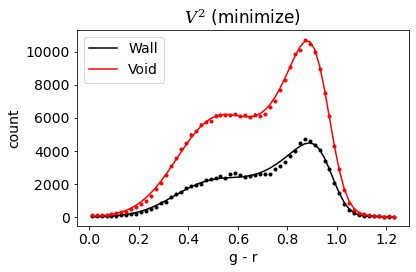

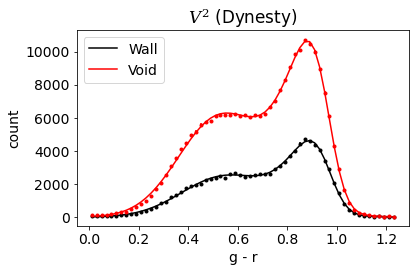

In [55]:
Model_2_plot(V2_gr_bestfit2.x, 
             gr_NSA[wall_v2], 
             gr_NSA[void_v2], 
             gr_bins, 
             2, 
             xlabel_text='g - r', 
             title_text='$V^2$ (minimize)')

Model_2_plot(V2_gr_bestfit2_dynesty, 
             gr_NSA[wall_v2], 
             gr_NSA[void_v2], 
             gr_bins, 
             2, 
             xlabel_text='g - r', 
             title_text='$V^2$ (Dynesty)')

##### VoidFinder

In [57]:
def prior_xform2_bi_VF(u):
    '''
    Priors for the 16 parameters of bimodal M2.  Required by the dynesty 
    sampler.


    PARAMETERS
    ==========

    u : ndarray
        Array of uniform random numbers between 0 and 1.


    RETURNS
    =======
    
    priors : ndarray
        Transformed random numbers giving prior ranges on model parameters.
    '''

    a1 = jeffreys(500, 5000, u[0])
    mu_a1 = uniform(0.2, 0.7, u[1])
    sigma_a1 = uniform(0.01, 1, u[2])
    skew_a1 = uniform(0, 5, u[3])

    b1 = jeffreys(500, 5000, u[4])
    mu_b1 = uniform(0.7, 1.2, u[5])
    sigma_b1 = uniform(0.01, 1, u[6])
    skew_b1 = uniform(-5, 0, u[7])
    
    a2 = jeffreys(100, 5000, u[8])
    mu_a2 = uniform(0.2, 0.7, u[9])
    sigma_a2 = uniform(0.01, 1, u[10])
    skew_a2 = uniform(0, 5, u[11])

    b2 = jeffreys(100, 1000, u[12])
    mu_b2 = uniform(0.7, 1.2, u[13])
    sigma_b2 = uniform(0.01, 1, u[14])
    skew_b2 = uniform(-5, 0, u[15])

    return a1, mu_a1, sigma_a1, skew_a1, b1, mu_b1, sigma_b1, skew_b1, \
           a2, mu_a2, sigma_a2, skew_a2, b2, mu_b2, sigma_b2, skew_b2

In [58]:
Model_2_sampler(prior_xform2_bi_VF, 
                gr_NSA[wall_vf], 
                gr_NSA[void_vf], 
                gr_bins, 
                2, 
                '_gr_VoidFinder')

running the nested sampler... this might take from minutes to hours...


1747it [00:11, 54.23it/s, batch: 0 | bound: 0 | nc: 102 | ncall: 16862 | eff(%): 10.062 | loglstar:   -inf < -83320.747 <    inf | logz: -83331.026 +/-  0.200 | dlogz: 54692.957 >  0.010] /Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
11198it [03:15, 57.49it/s, batch: 0 | bound: 143 | nc: 25 | ncall: 254866 | eff(%):  4.385 | loglstar:   -inf < -6601.861 <    inf | logz: -6630.191 +/-  0.330 | dlogz: 3749.934 >  0.010] /Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/dynesty/sampling.py:243: UserWarning: R

sampler output saved as pickle file 'dynesty_output/sampler_results_model2_gr_VoidFinder'


In [59]:
temp_infile = open('dynesty_output/sampler_results_model2_gr_VoidFinder.pickle', 'rb')
dres2_VF_gr = pickle.load(temp_infile)
temp_infile.close()

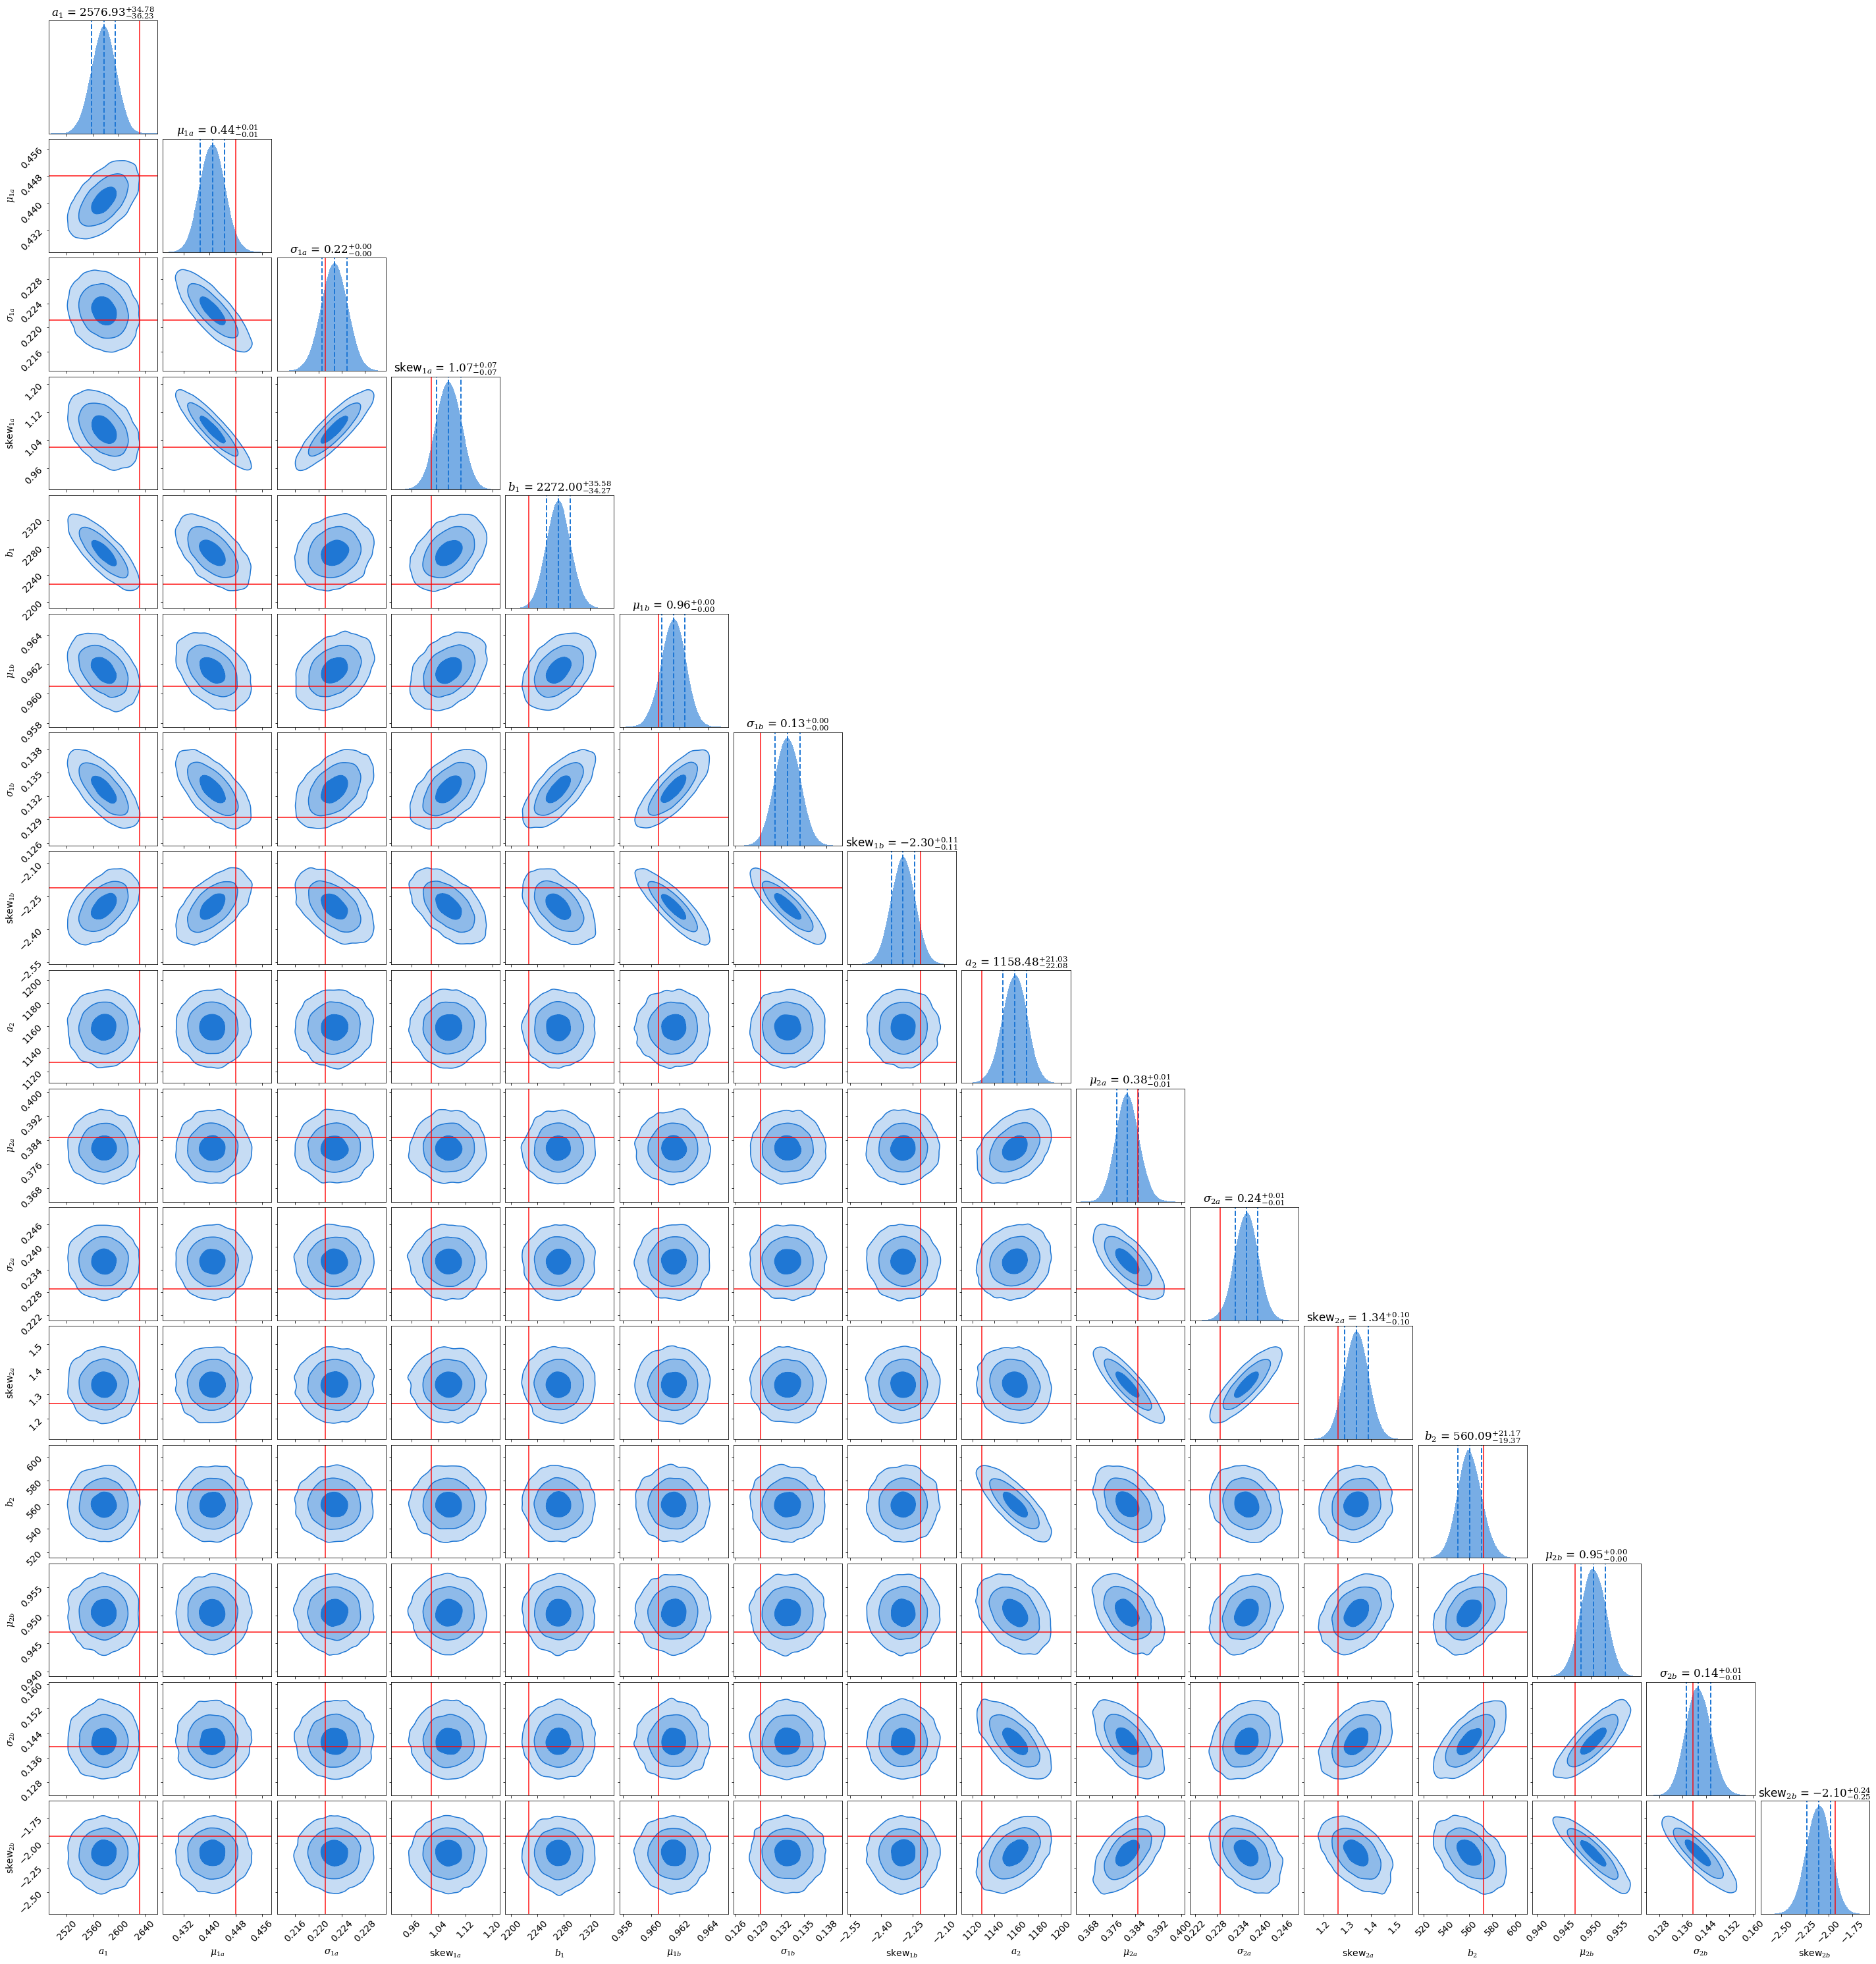

In [60]:
n_params = len(labels2_bi)

fig, axes = dyplot.cornerplot(dres2_VF_gr, smooth=0.03, 
                              labels=labels2_bi, 
                              truths=VF_gr_bestfit2.x,
                              show_titles=True, 
                              quantiles_2d=[1-np.exp(-0.5*r**2) for r in [1, 2, 3]], 
                              quantiles=[0.16, 0.5, 0.84], 
                              fig=plt.subplots(n_params, n_params, figsize=(2.5*n_params, 2.6*n_params)), 
                              color='#1f77d4')

In [61]:
lnzM2_VF_gr = dres2_VF_gr.logz[-1]
lnzM2_VF_gr

-955.7524066554337

In [62]:
VF_gr_bestfit2_dynesty,_ = dyfunc.mean_and_cov(dres2_VF_gr.samples, 
                                               np.exp(dres2_VF_gr.logwt - lnzM2_VF_gr))

VF_gr_bestfit2_dynesty

array([ 2.57681256e+03,  4.40890285e-01,  2.22730305e-01,  1.07044406e+00,
        2.27222578e+03,  9.61558515e-01,  1.32867666e-01, -2.29605660e+00,
        1.15826231e+03,  3.81443392e-01,  2.36144686e-01,  1.33818718e+00,
        5.60410024e+02,  9.50421038e-01,  1.41432127e-01, -2.10704802e+00])

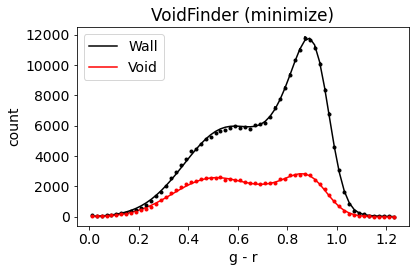

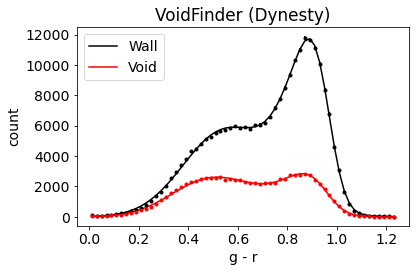

In [63]:
Model_2_plot(VF_gr_bestfit2.x, 
             gr_NSA[wall_vf], 
             gr_NSA[void_vf], 
             gr_bins, 
             2, 
             xlabel_text='g - r', 
             title_text='VoidFinder (minimize)')

Model_2_plot(VF_gr_bestfit2_dynesty, 
             gr_NSA[wall_vf], 
             gr_NSA[void_vf], 
             gr_bins, 
             2, 
             xlabel_text='g - r', 
             title_text='VoidFinder (Dynesty)')

## Bayes Factor

In [56]:
lnB12_V2_gr = lnzM1_V2_gr - lnzM2_V2_gr

B12_V2_gr = np.exp(lnB12_V2_gr)

print('V2 (g - r): B12 = {:.3g}; log(B12) = {:.3g}'.format(B12_V2_gr, np.log10(B12_V2_gr)))

V2 (g - r): B12 = 1.31e-58; log(B12) = -57.9


In [64]:
lnB12_VF_gr = lnzM1_VF_gr - lnzM2_VF_gr

B12_VF_gr = np.exp(lnB12_VF_gr)

print('VoidFinder (g - r): B12 = {:.3g}; log(B12) = {:.3f}'.format(B12_VF_gr, lnB12_VF_gr*np.log10(np.exp(1))))

VoidFinder (g - r): B12 = 0; log(B12) = -1648.260


So both VoidFinder and V$^2$ favor $\mathcal{M}_2$, in which the two data sets come from different parent distributions, although VoidFinder favors it much more than V$^2$.